In [106]:
from PIL import Image
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [107]:
images_path = []

for file in os.listdir('./testing-data/'):
    print(file)
    images_path.append(file)

cat-face-angry.jpg
cat-face-happy.jpg
cat-face-other.jpeg
cat-face-sad.jpg
cat2-face-angry.jpg
cat2-face-other.jpg
cat3-face-angry.jpg
cat3-face-other.jpg
dog-face-angry.jpg
dog-face-happy.jpg
dog-face-other.jpg
dog-face-sad.jpg
dog1-face-sad.jpg
dog2-face-happy.jpg
dog2-face-sad.jpg
dog3-face-happy.jpg


In [108]:
images_path

['cat-face-angry.jpg',
 'cat-face-happy.jpg',
 'cat-face-other.jpeg',
 'cat-face-sad.jpg',
 'cat2-face-angry.jpg',
 'cat2-face-other.jpg',
 'cat3-face-angry.jpg',
 'cat3-face-other.jpg',
 'dog-face-angry.jpg',
 'dog-face-happy.jpg',
 'dog-face-other.jpg',
 'dog-face-sad.jpg',
 'dog1-face-sad.jpg',
 'dog2-face-happy.jpg',
 'dog2-face-sad.jpg',
 'dog3-face-happy.jpg']

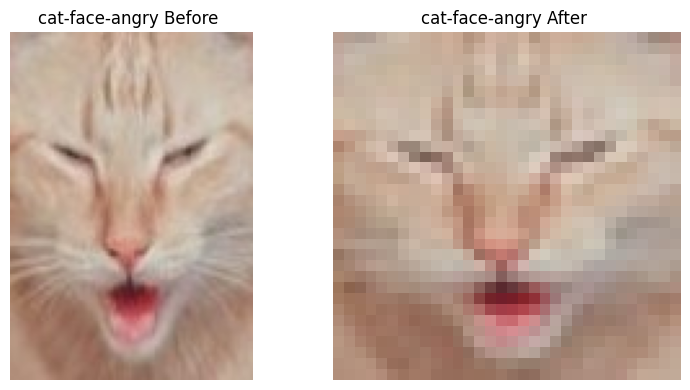

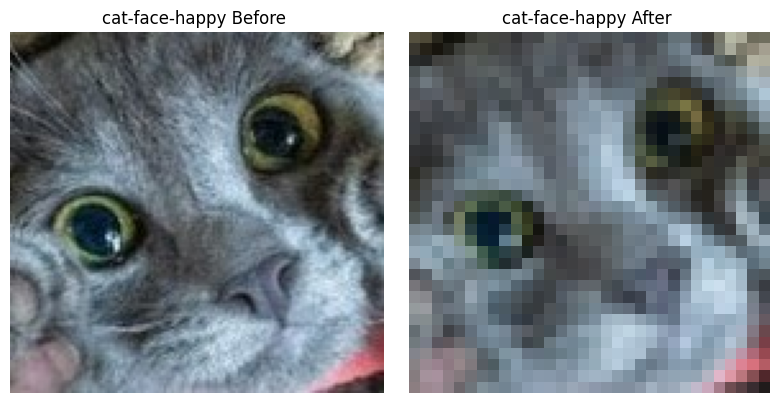

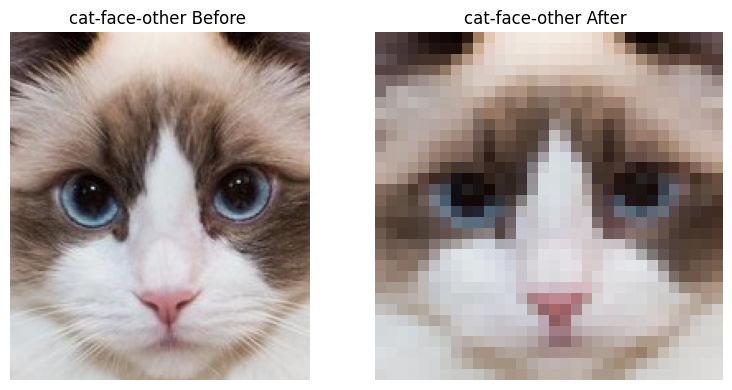

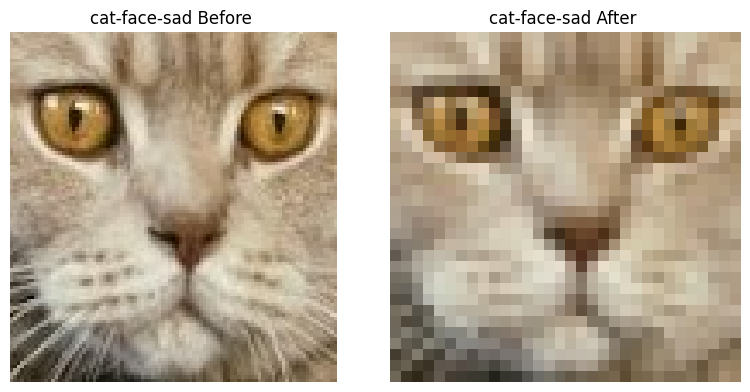

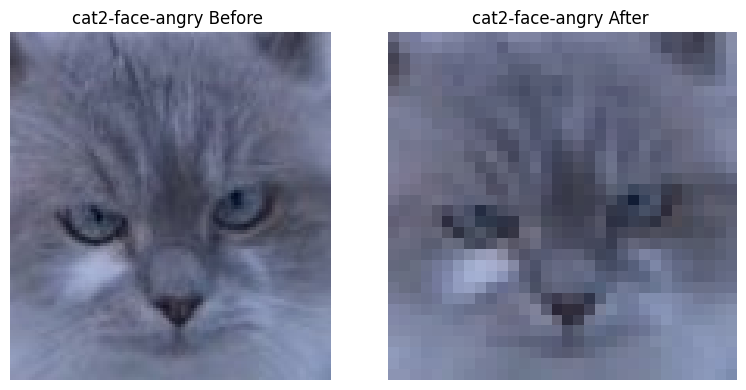

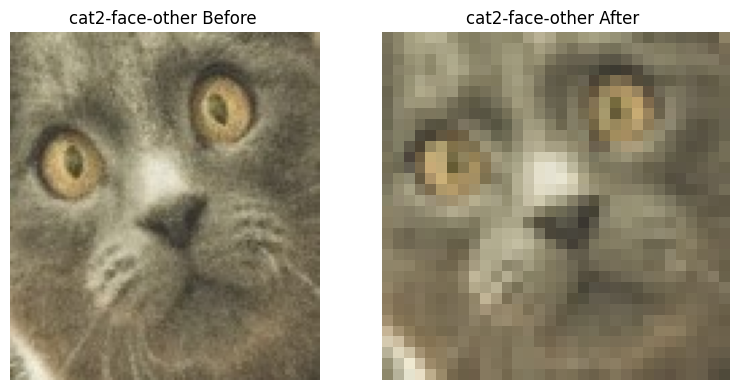

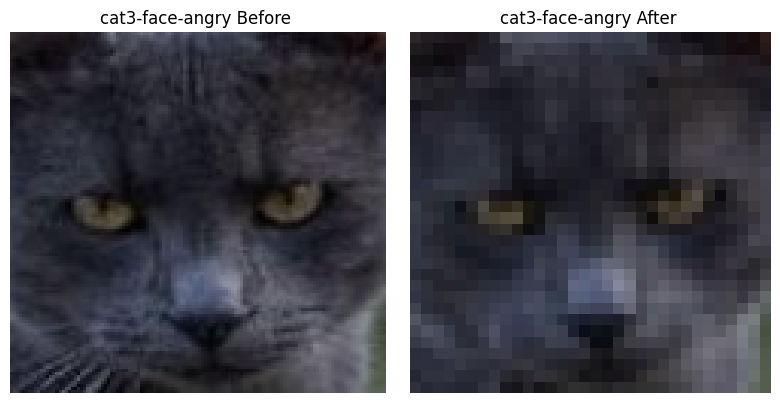

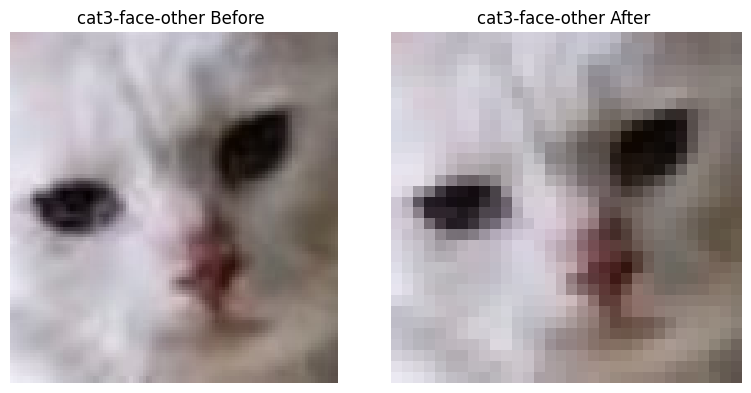

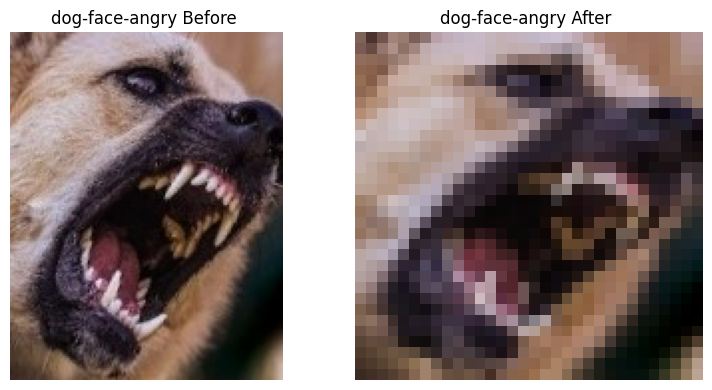

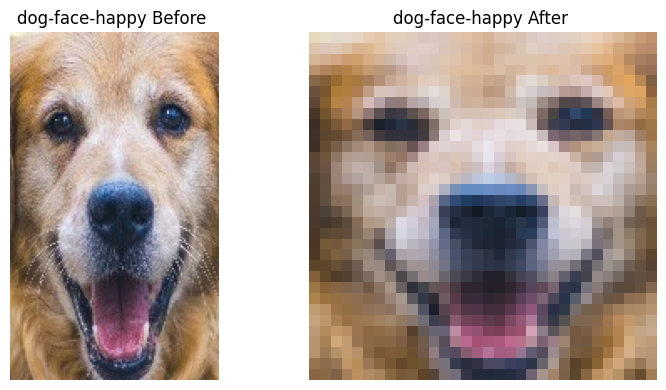

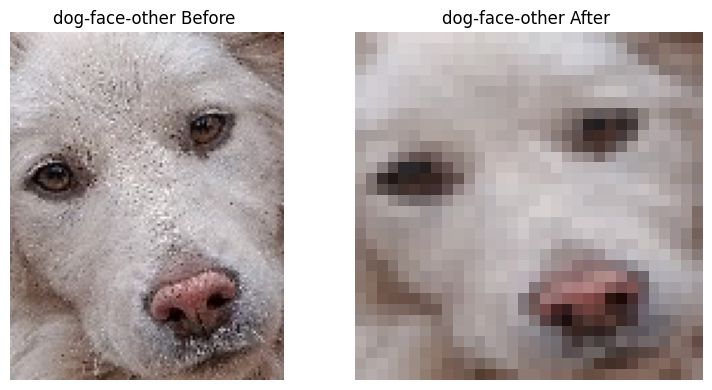

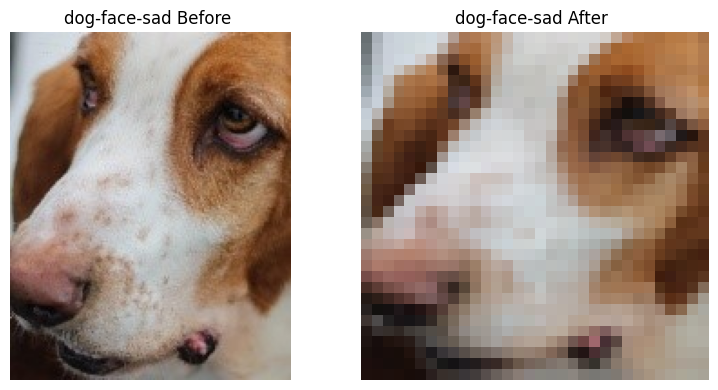

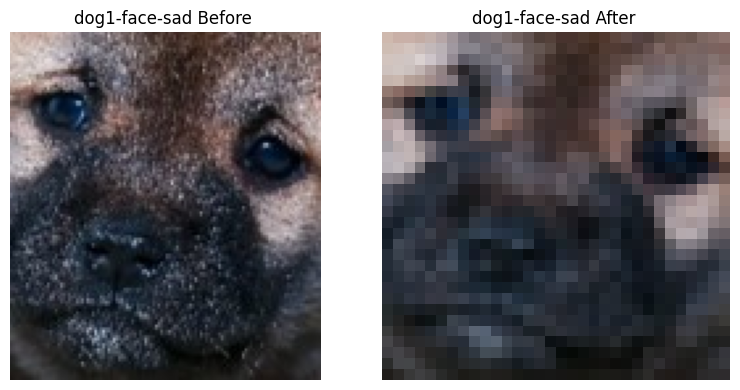

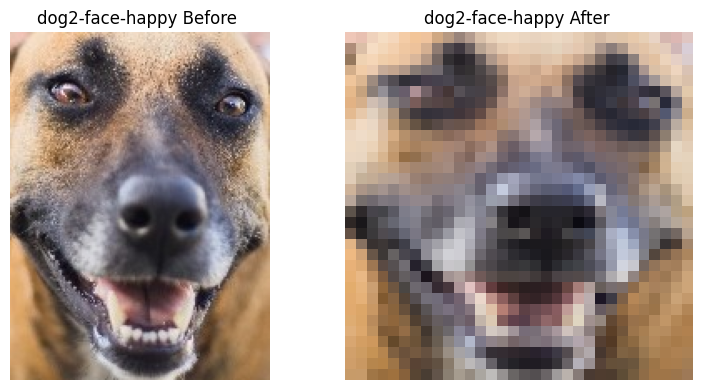

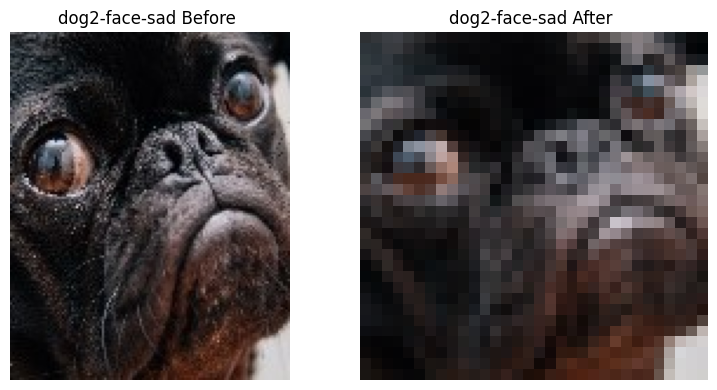

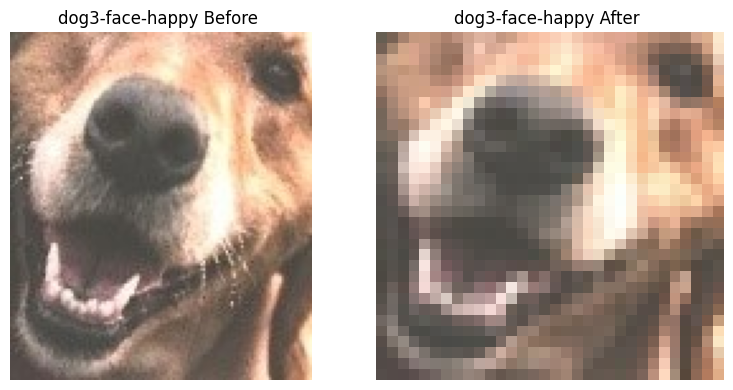

In [109]:
for image_path in images_path:
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))

    # Menampilkan gambar sebelum resize
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} Before ")
    plt.imshow(img)
    plt.axis('off')

    # Menampilkan gambar setelah 
    plt.subplot(1, 2, 2)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} After ")
    plt.imshow(resized_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [110]:

def calculate_ncdblbp_anticlockwise(image):
    gray, rows, cols, ncdlbp_anticlockwise = pre_lbp(image)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j - 1], gray[i, j - 1],
                         gray[i + 1, j - 1], gray[i + 1, j], gray[i + 1, j + 1],
                         gray[i, j + 1], gray[i - 1, j + 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_anticlockwise[i, j] = code    
    return ncdlbp_anticlockwise

def pre_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape[0], gray.shape[1]
    pre_lbp = np.zeros((rows, cols), dtype=np.uint8)  
    return gray, rows, cols, pre_lbp

def process_image(image, data, label):
    # file_path = os.path.join(subfolder_path, file)
    # image_path = file_path
    # image = cv2.imread(image_path)
    
    temp_lbp = calculate_ncdblbp_anticlockwise(image)
    temp_lbp = temp_lbp.flatten()
    temp_lbp = temp_lbp.astype(object)
    temp_lbp = np.insert(temp_lbp, 0, label)
    data.append(temp_lbp)

In [111]:
data = []
for image_path in images_path:
    # try:
    label = image_path.split("-")[-1].split(".")[0]
    # print(label)
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))
    resized_img = cv2.cvtColor(np.array(resized_img), cv2.COLOR_RGB2BGR)

    process_image(resized_img, data, label)
    # except: 
    #     print(images_path)

In [112]:
df = pd.DataFrame(data)
df.shape

(16, 1025)

In [113]:
df.head()

0     1     2     3     4     5     6     7     8     9     ...  1015  \
0  angry     0     0     0     0     0     0     0     0     0  ...     0   
1  happy     0     0     0     0     0     0     0     0     0  ...     0   
2  other     0     0     0     0     0     0     0     0     0  ...     0   
3    sad     0     0     0     0     0     0     0     0     0  ...     0   
4  angry     0     0     0     0     0     0     0     0     0  ...     0   

   1016  1017  1018  1019  1020  1021  1022  1023  1024  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 1025 columns]

In [114]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [115]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

In [116]:
x = df.iloc[:,1:]
y = df.iloc[:,[0]]

y_encoded = pd.DataFrame(label_encoder.fit_transform(y))
x = pd.DataFrame(scaler.fit_transform(x))

combined_df = pd.concat([x, y_encoded], axis=1)

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
combined_df.head()

0     1     2     3     4     5     6     7     8     9     ...  1015  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1016  1017  1018  1019  1020  1021  1022  1023  0     
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     1  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     2  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     3  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0  

[5 rows x 1025 columns]

In [118]:
combined_df = combined_df.loc[:, (combined_df != 0).any(axis=0)]
combined_df.head()

33        34        35        36        37        38        39   \
0 -0.702053 -0.499769 -0.494637  0.859357  0.871299 -0.006475 -1.510105   
1  0.294862 -0.007883  0.062871 -0.018284 -0.021400 -0.977700  1.273033   
2 -1.951706 -1.218681 -0.664313 -0.725273 -0.730668 -0.148921  1.239366   
3 -1.544516 -0.852919  0.899133  0.847167  1.629482  1.184894 -0.500095   
4  0.322944  0.849766  0.947612  0.115800  0.944671 -0.058273  0.644583   

        40        41        42   ...       982       983       984       985  \
0 -1.102685  1.137146 -1.978625  ...  1.223737 -2.020810 -1.971493 -0.478659   
1 -1.168681  1.137146 -0.534350  ... -0.441555 -0.499259 -0.456341  0.953620   
2  1.295174  0.954157  1.116251  ... -0.353244 -0.473900 -0.456341 -0.561518   
3 -1.256676 -1.777607 -0.134595  ...  0.466786  0.413672 -0.338787  0.373606   
4 -1.355670 -0.104565  1.309680  ...  1.236353  1.022292  1.111057  0.870761   

        986       987       988       989       990  0    
0 -0.259039 -0.560215 -0.793669  1.004702  1.379056    0  
1  0.753567 -1.850581 -2.153814 -0.496539 -0.031998    1  
2 -0.188392  1.006658  0.650733 -0.802101 -0.319204    2  
3 -0.058872 -0.110891  0.831283 -0.775530 -1.118385    3  
4  1.047929  0.730151  0.650733  0.486575 -1.580412    0  

[5 rows x 901 columns]

In [119]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb 

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101

from tensorflow.keras import layers, Model


In [120]:
lda = LinearDiscriminantAnalysis(n_components=3)

X = combined_df.iloc[:,:-1]
y = combined_df.iloc[:,-1:]

X_lda = lda.fit_transform(X, y)

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
X_lda

array([[ 0.23178251, -0.4517856 ,  1.22861301],
       [-0.27001951, -0.92685685,  1.55351321],
       [-1.61439402,  1.31478239, -0.00398839],
       [-0.25051867, -0.69250608,  0.88701648],
       [ 0.55955119,  0.47512163, -0.24894416],
       [ 0.00572886, -1.50900454, -1.16328037],
       [-0.86251937,  1.58319823,  0.42317095],
       [ 1.78031232,  0.70850831,  0.77198467],
       [-0.77399962, -0.49402167, -1.48069271],
       [-0.03976948,  0.76812497, -0.52317944],
       [ 1.47466368, -0.52679736, -0.01892522],
       [ 1.57723349,  0.74600954, -1.11384098],
       [-0.68666315, -0.80906618,  0.28898097],
       [-0.56474941, -1.0171037 , -0.36876099],
       [-0.26546314,  0.54114617,  0.70842962],
       [-0.3011757 ,  0.29025073, -0.94009664]])

In [122]:
y

0
0   0
1   1
2   2
3   3
4   0
5   2
6   0
7   2
8   0
9   1
10  2
11  3
12  3
13  1
14  3
15  1

In [123]:
from tensorflow.keras.models import load_model


In [124]:
model = load_model("./models/resnet.h5")
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 reshape_6 (Reshape)            (None, 3, 1)         0           ['input_7[0][0]']                
                                                                                                  
 dense_62 (Dense)               (None, 3, 64)        128         ['reshape_6[0][0]']              
                                                                                                  
 batch_normalization_15 (BatchN  (None, 3, 64)       256         ['dense_62[0][0]']               
 ormalization)                                                                              

In [128]:
pred = model.predict(X_lda)
pred = np.argmax(model.predict(X_lda), axis=1)
pred

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


array([3, 3, 0, 3, 1, 1, 0, 2, 1, 1, 2, 2, 3, 3, 2, 1], dtype=int64)

In [141]:
label_map = {
    0: "angry",
    1: "happy",
    2: "other",
    3: "sad"
}

In [137]:
true_y = y.values.flatten().tolist()
true_y

[0, 1, 2, 3, 0, 2, 0, 2, 0, 1, 2, 3, 3, 1, 3, 1]

In [142]:
pred = [label_map[val] for val in pred]
true_y = [label_map[val] for val in true_y]
true_y

['angry',
 'happy',
 'other',
 'sad',
 'angry',
 'other',
 'angry',
 'other',
 'angry',
 'happy',
 'other',
 'sad',
 'sad',
 'happy',
 'sad',
 'happy']

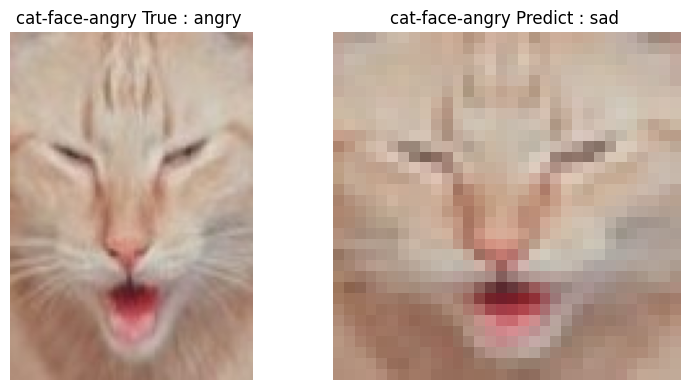

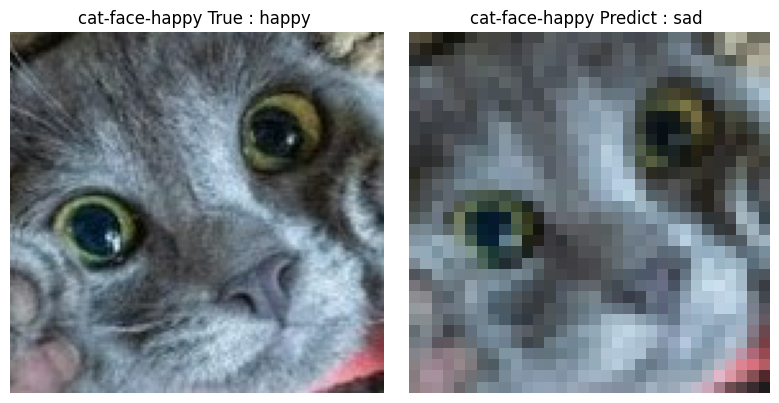

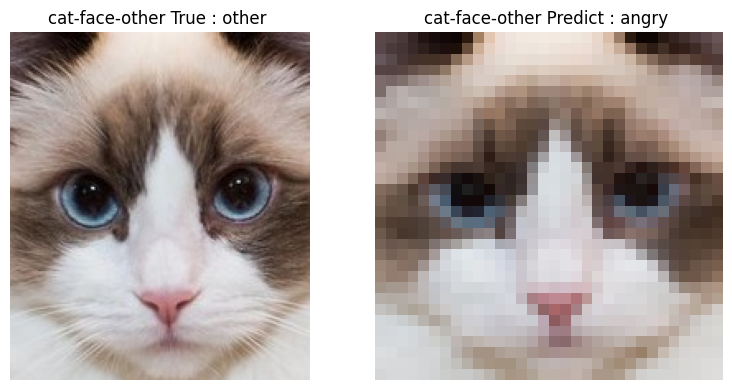

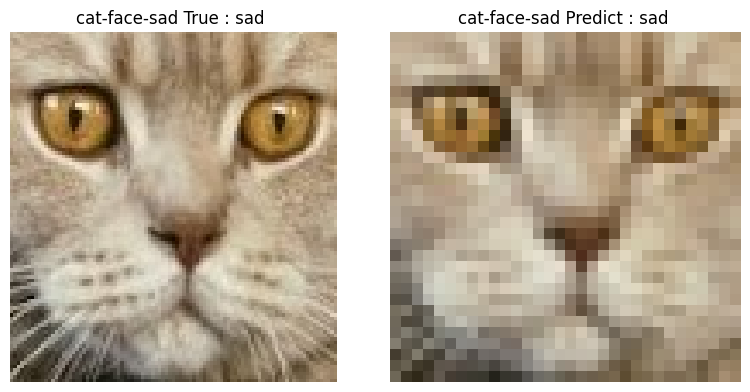

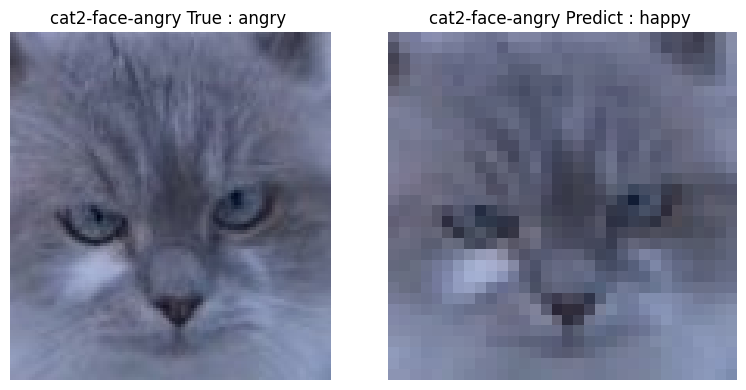

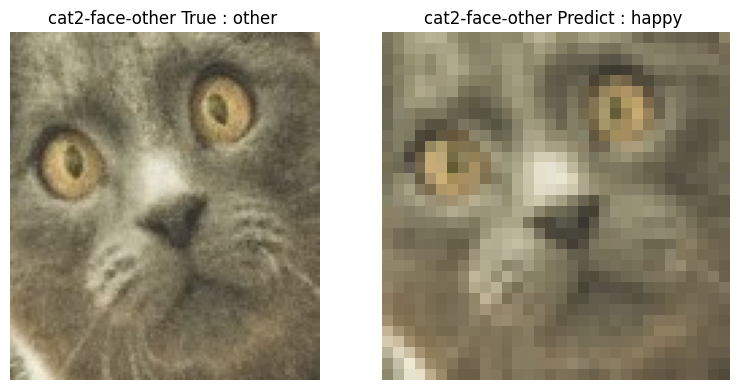

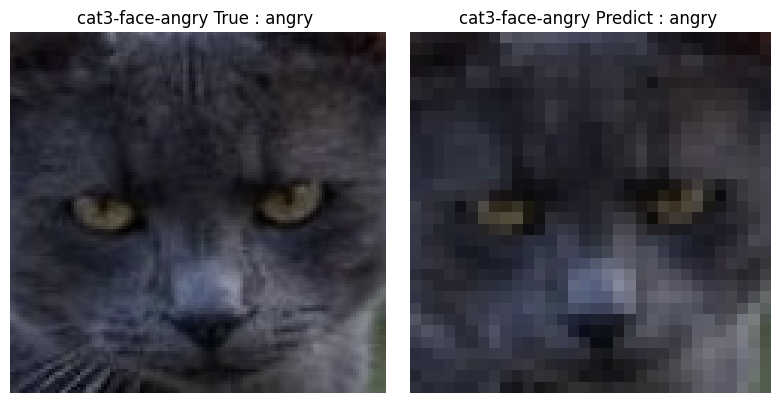

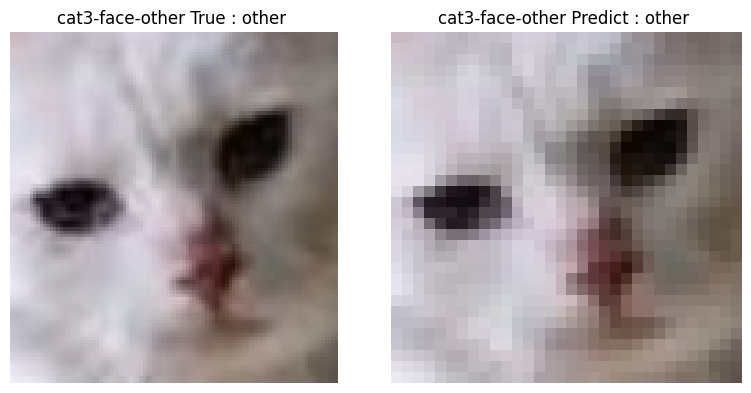

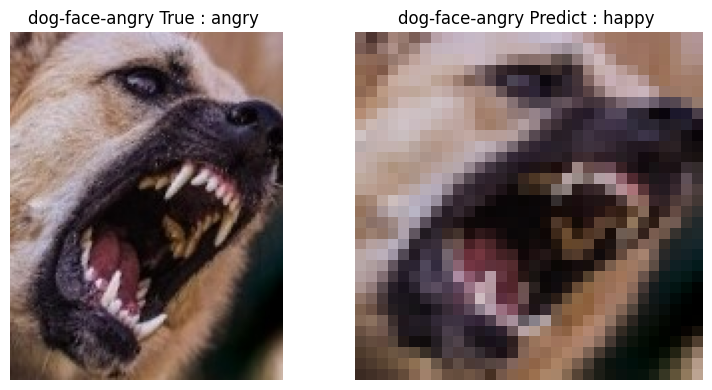

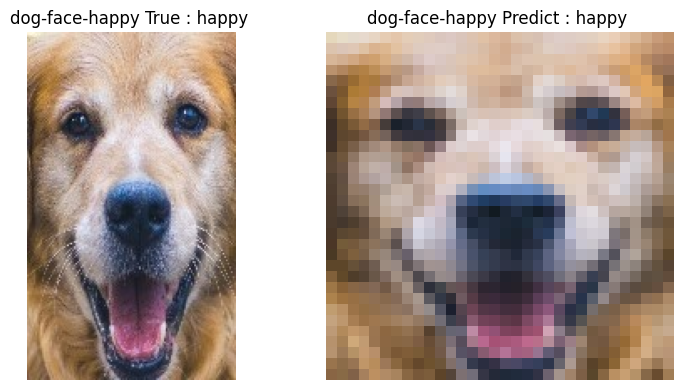

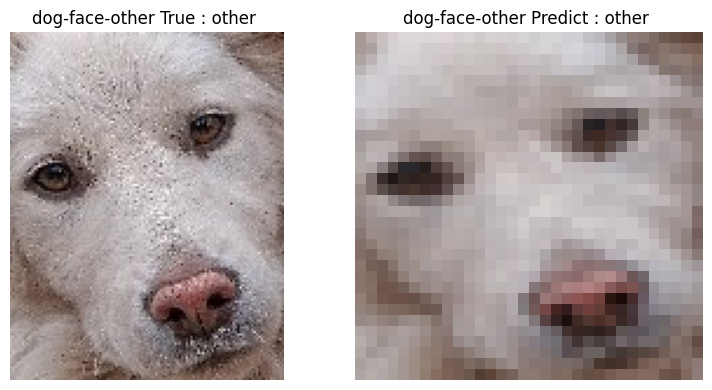

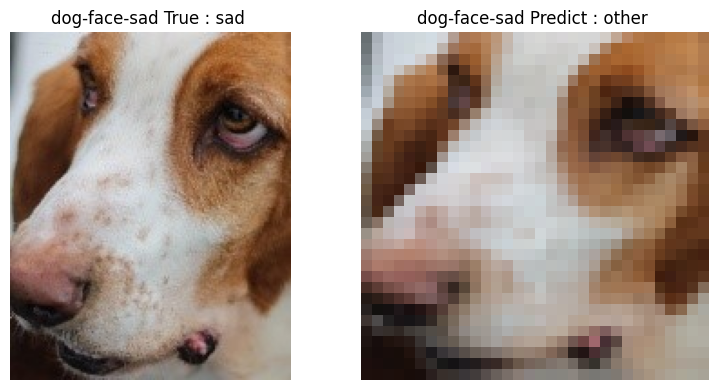

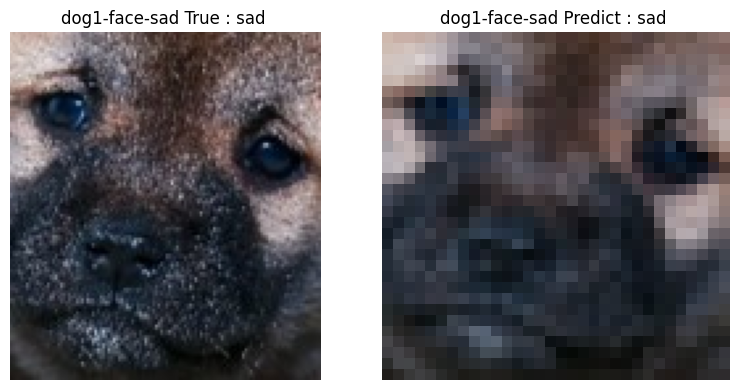

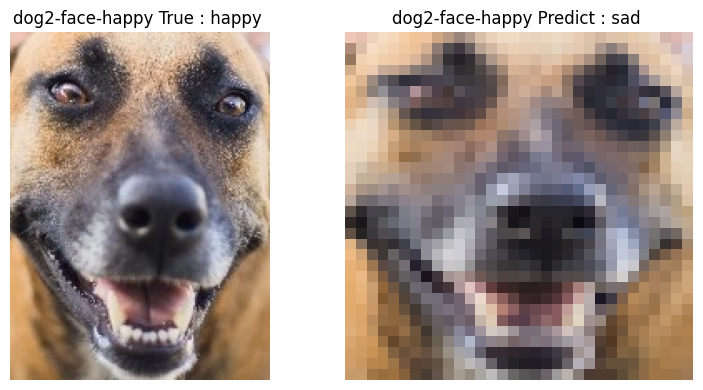

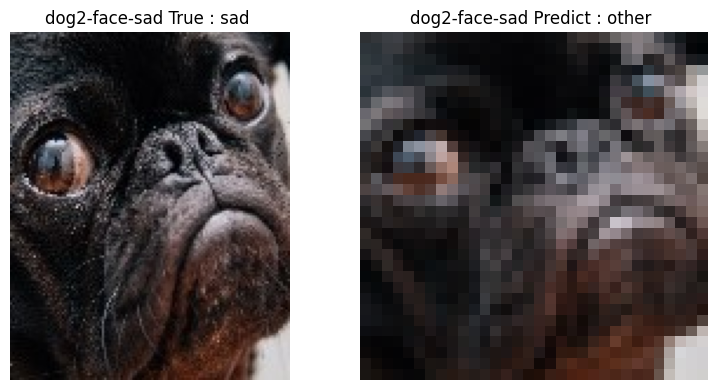

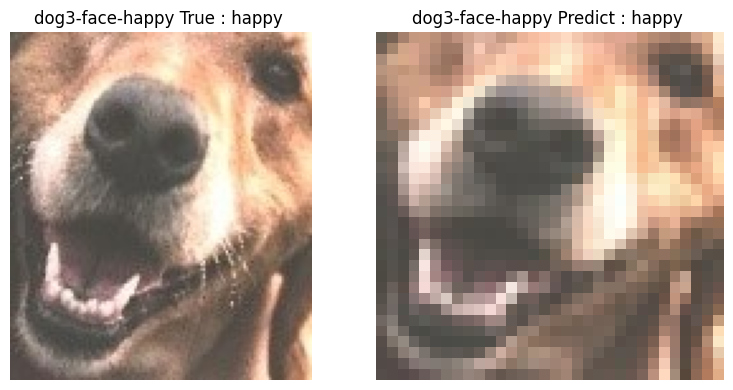

In [143]:
for i, image_path in enumerate(images_path):
    img = Image.open(f"./testing-data/{image_path}")
    resized_img = img.resize((32, 32))

    # Menampilkan gambar sebelum resize
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} True : {true_y[i]} ")
    plt.imshow(img)
    plt.axis('off')

    # Menampilkan gambar setelah 
    plt.subplot(1, 2, 2)
    plt.title(f"{image_path.split('/')[-1].split('.')[0]} Predict : {pred[i]} ")
    plt.imshow(resized_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()